<a href="https://colab.research.google.com/github/selyraa/2141720005-pcvk-2023/blob/main/week-06/JS06_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

## 1. Menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## 3. Membuat Histogram Citra

<BarContainer object of 256 artists>

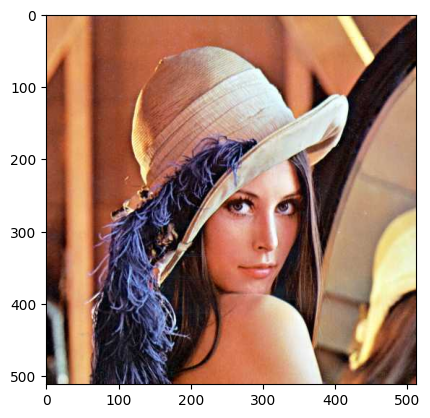

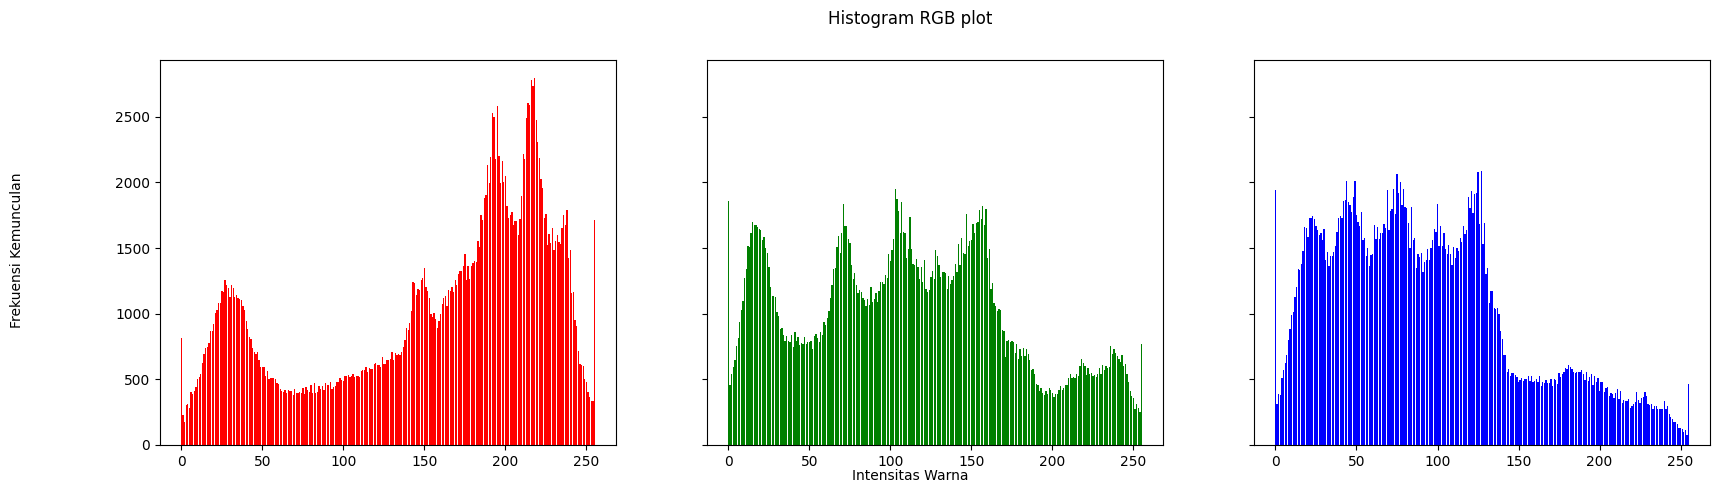

In [50]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Frekuensi Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


## 4. Membuat Histogram Citra menggunakan Library yang dimiliki oleh NumPy yaitu “histogram”

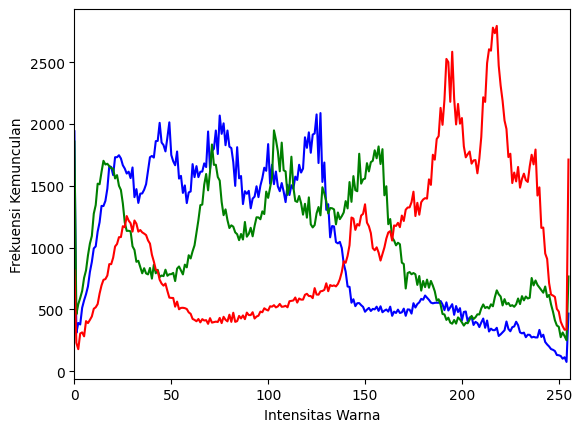

In [15]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Frekuensi Kemunculan")

plt.show()

Antara kedua histogram tersebut memiliki perbedaan dalm visualisasi data. Histogram pertama disajikan dalam masing-masing channel warna (R, G, B). Namun histogram kedua disajikan sekaligus 3 channel warna, namun tetap terlihat frekuensi dari masing-masing warna.

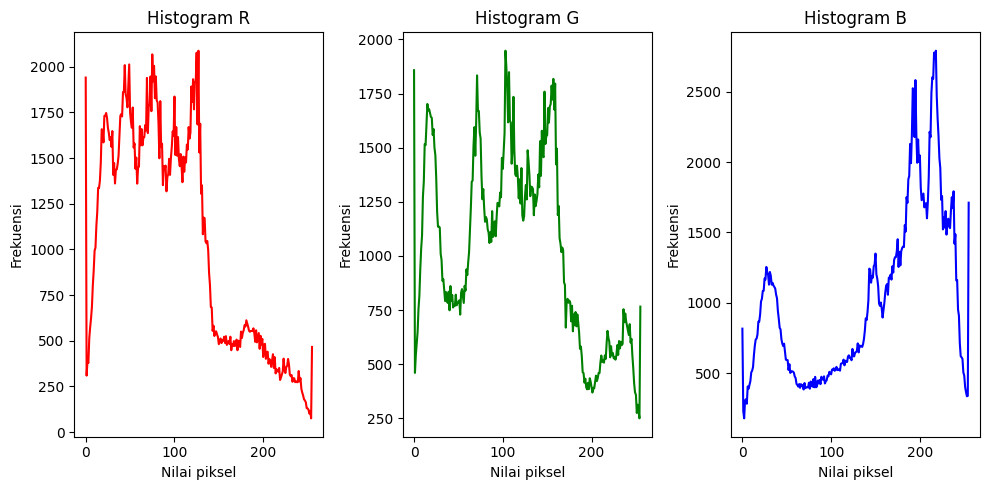

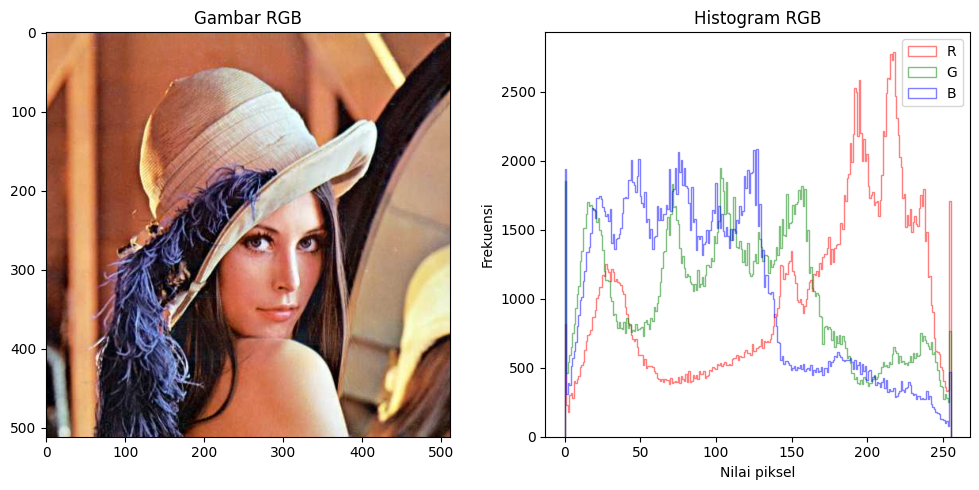

In [51]:
# Mengonversi gambar BGR (format OpenCV) menjadi RGB (format Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mendapatkan nilai histogram warna RGB untuk masing-masing saluran warna
hist_b, bin_edges_b = np.histogram(img_rgb[:, :, 0], bins=256, range=(0, 256))
hist_g, bin_edges_g = np.histogram(img_rgb[:, :, 1], bins=256, range=(0, 256))
hist_r, bin_edges_r = np.histogram(img_rgb[:, :, 2], bins=256, range=(0, 256))

# Membuat subplot untuk menampilkan histogram
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Histogram R')
plt.xlabel('Nilai piksel')
plt.ylabel('Frekuensi')
plt.plot(bin_edges_r[0:-1], hist_r, color='red')

plt.subplot(132)
plt.title('Histogram G')
plt.xlabel('Nilai piksel')
plt.ylabel('Frekuensi')
plt.plot(bin_edges_g[0:-1], hist_g, color='green')

plt.subplot(133)
plt.title('Histogram B')
plt.xlabel('Nilai piksel')
plt.ylabel('Frekuensi')
plt.plot(bin_edges_b[0:-1], hist_b, color='blue')

plt.tight_layout()

# Menampilkan gambar dan histogram
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Gambar RGB')
plt.imshow(img_rgb)

plt.subplot(122)
plt.title('Histogram RGB')
plt.xlabel('Nilai piksel')
plt.ylabel('Frekuensi')
plt.hist(img_rgb[:, :, 0].ravel(), bins=256, color='red', alpha=0.5, label='R', histtype='step')
plt.hist(img_rgb[:, :, 1].ravel(), bins=256, color='green', alpha=0.5, label='G', histtype='step')
plt.hist(img_rgb[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='B', histtype='step')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


## 5. Membuat Histogram Equalization

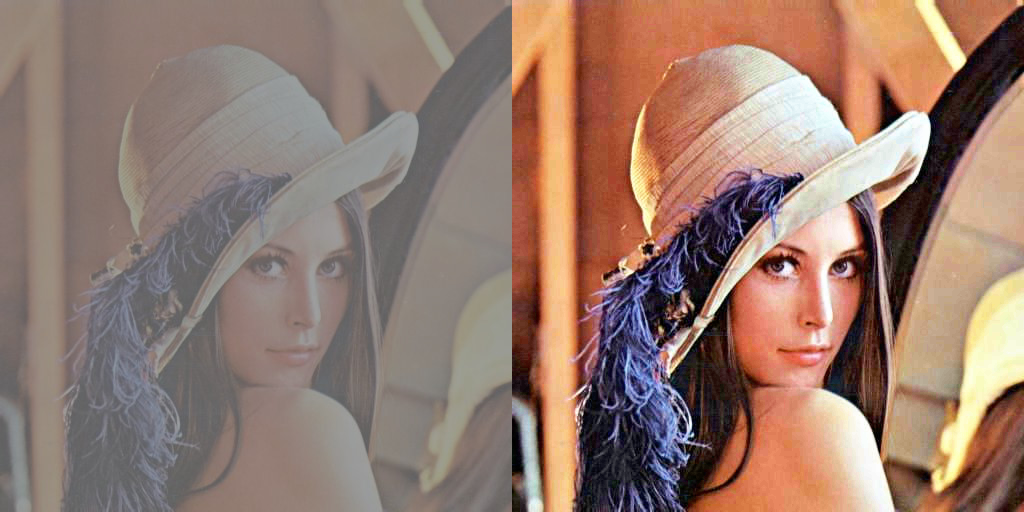

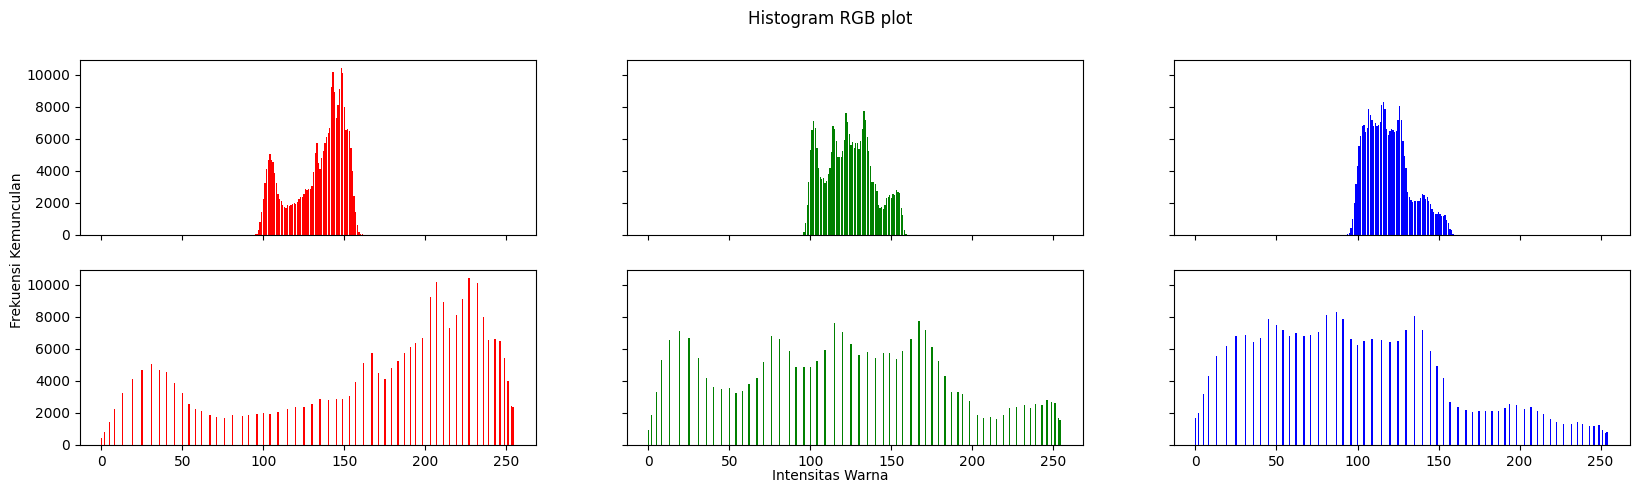

In [52]:
img_1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

def histog(img_1):
  height, width, depth = np.shape(img_1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img_1[y][x][0]] += 1
      ax[1][img_1[y][x][1]] += 1
      ax[2][img_1[y][x][2]] += 1
  return ax

histo_asli = histog(img_1)

#convert to Numpy array
img_1_array = np.asarray(img_1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_1_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_1_list = list(img_1_array.flatten())

# transform pixel values to equalize
eq_img_1_list = [transform_map[p] for p in img_1_list]

# reshape and write back into img_1_array
eq_img_1_array = np.reshape(np.asarray(eq_img_1_list), img_1_array.shape)
img_12 = eq_img_1_array

equal_histo = histog(img_12)

final_frame = cv.hconcat((img_1, img_12)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg_1 = np.array_equal(blue, green, red)
if (isgrayimg_1 == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Frekuensi Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

## 6. Membuat Histogram Equalization menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”

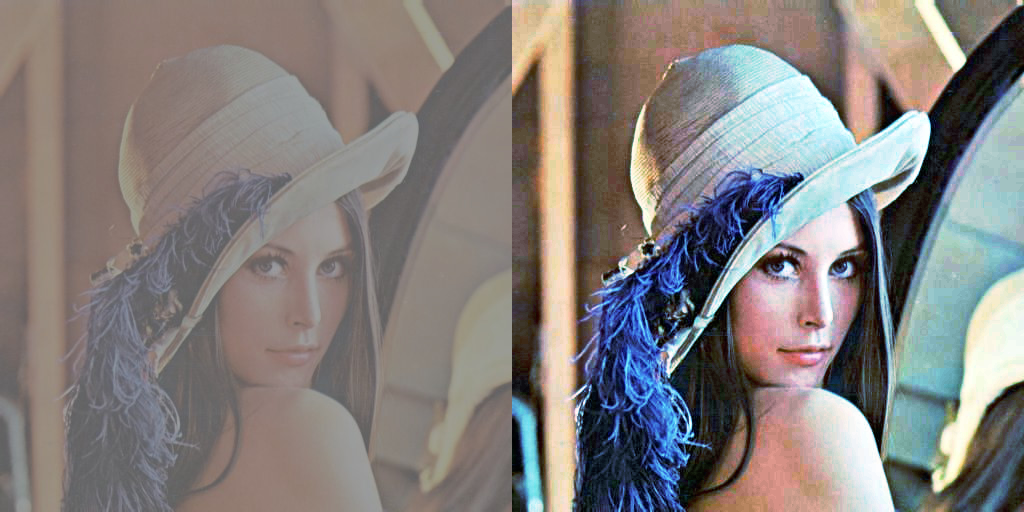

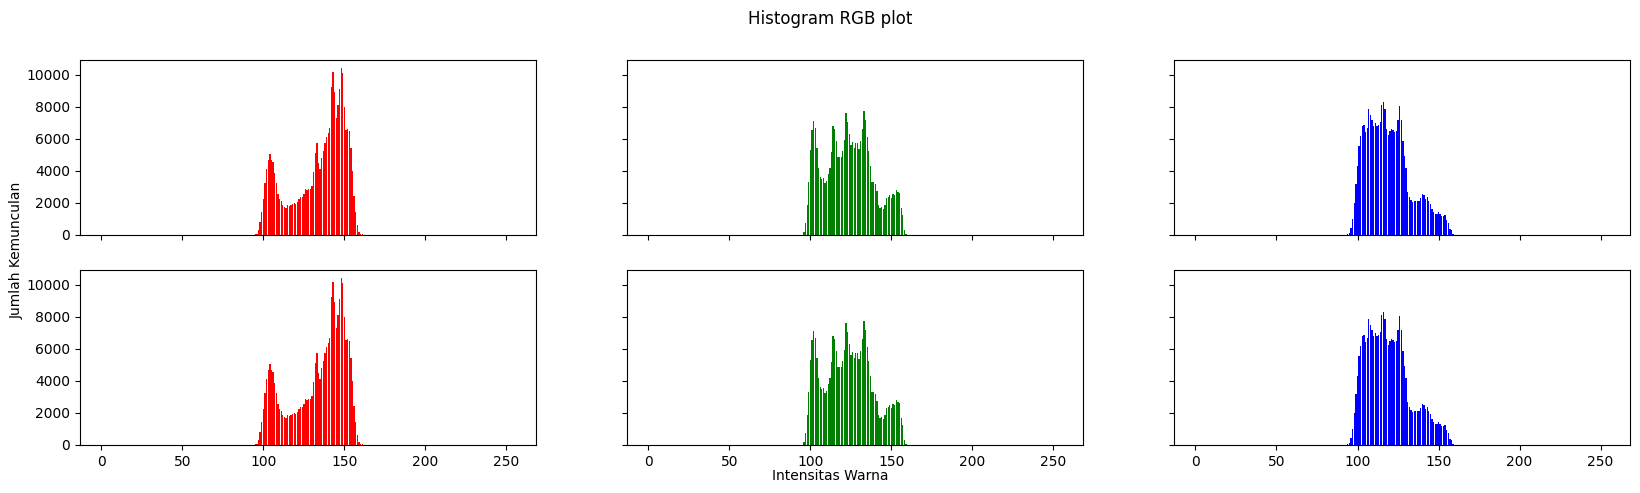

In [53]:
channels = cv.split(img_1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img_1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Frekuensi Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

## 7. Melakukan proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

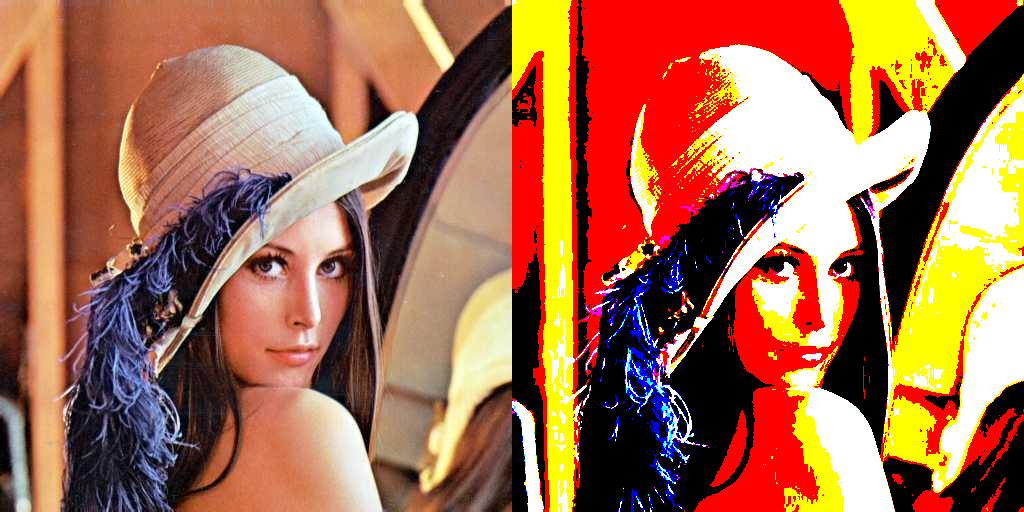

In [54]:
# 7. Proses pemetaan 16 juta warna RGB ke dalam 8 warna yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

## 8. Melakukan proses dithering Floyd and Steinberg

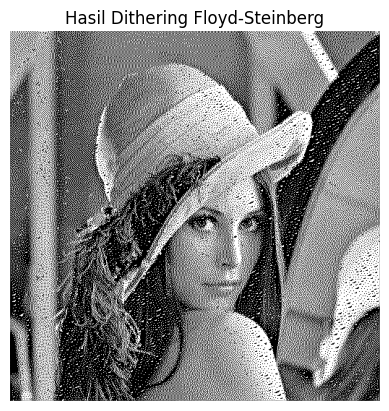

In [92]:

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg', cv2.IMREAD_GRAYSCALE)

# Ukuran gambar
height, width = img.shape

# Proses dithering Floyd-Steinberg
for y in range(0, height - 1):
    for x in range(1, width - 1):
        old_pixel = img[y, x]
        new_pixel = 255 if old_pixel > 127 else 0
        img[y, x] = new_pixel
        error = old_pixel - new_pixel
        img[y, x + 1] += error * 7 / 16
        img[y + 1, x - 1] += error * 3 / 16
        img[y + 1, x] += error * 5 / 16
        img[y + 1, x + 1] += error * 1 / 16

# Mengonversi gambar ke format RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

plt.imshow(img_rgb, cmap='Pastel1')
plt.title('Hasil Dithering Floyd-Steinberg')
plt.axis('off')
plt.show()


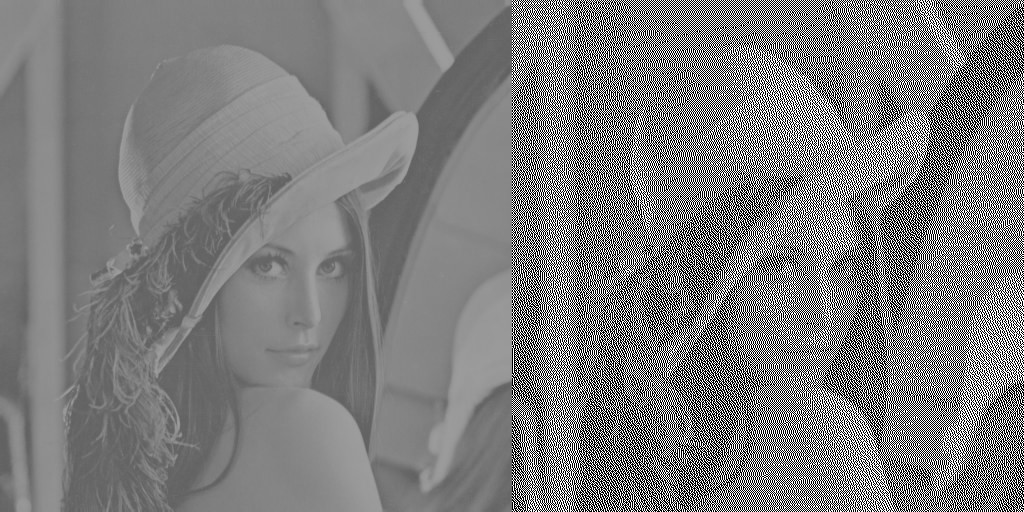

In [97]:
Image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img_gray = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)

GrayImage = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)
# cv.imwrite('/content/drive/MyDrive/PCVK/Images/lena_gray.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

# cv.imwrite('/content/drive/MyDrive/PCVK/Images1/lena_gray.jpg', GrayImage)
final_frame = cv.hconcat((img_gray, GrayImage))
cv2_imshow(final_frame)

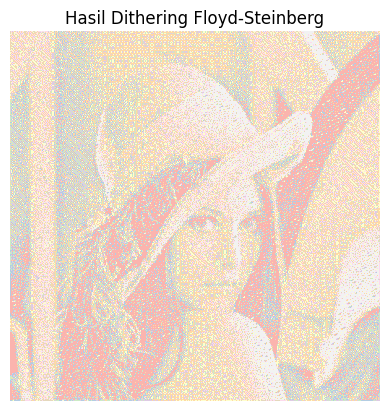

In [90]:

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg', cv2.IMREAD_GRAYSCALE)

# Ukuran gambar
height, width = img.shape

# Proses dithering Floyd-Steinberg
for y in range(0, height - 1):
    for x in range(1, width - 1):
        old_pixel = img[y, x]
        new_pixel = 255 if old_pixel > 127 else 0
        img[y, x] = new_pixel
        error = old_pixel - new_pixel
        img[y, x + 1] += error * 7 / 16
        img[y + 1, x - 1] += error * 3 / 16
        img[y + 1, x] += error * 5 / 16
        img[y + 1, x + 1] += error * 1 / 16

# Menyimpan gambar hasil dithering
cv2.imwrite('lena_dithered.png', img)

plt.imshow(img, cmap='Pastel1')
plt.title('Hasil Dithering Floyd-Steinberg')
plt.axis('off')
plt.show()


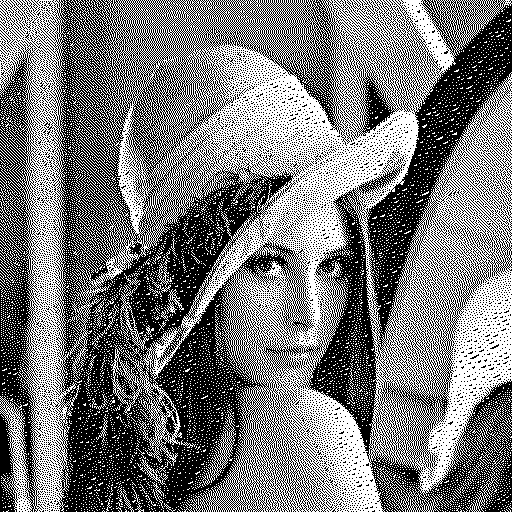

In [79]:
import cv2
import numpy as np

# Baca gambar 'lena.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan algoritma dithering Floyd-Steinberg
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_pixel = img[y, x]
        new_pixel = 255 if old_pixel > 127 else 0
        img[y, x] = new_pixel
        error = old_pixel - new_pixel

        if x < width - 1:
            img[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img[y + 1, x - 1] += error * 3 / 16
            img[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img[y + 1, x + 1] += error * 1 / 16

# Menampilkan gambar asli
# cv2_imshow('Gambar Asli', cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg'))

# Menampilkan gambar hasil dithering Floyd-Steinberg
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()
